# Preprocessing

In [13]:
%matplotlib inline

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

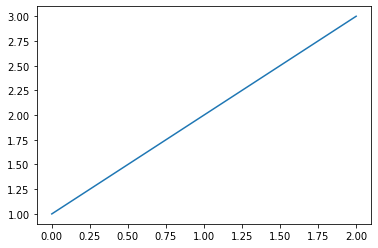

In [15]:
plt.plot([1,2,3])
plt.show()

In [16]:
# Install the PyDP package
! pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pydp as dp  # by convention our package is to be imported as dp (for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max, BoundedVariance
import pandas as pd
import statistics  # for calculating mean without applying differential privacy

In [18]:


df = pd.read_csv("/content/drive/MyDrive/Soph S2/yellow_cab_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25
1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00
2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00
3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00
4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN
149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN
149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN
149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN


In [20]:
datatypes = []
for col in df.columns:
    datatypes.append(str(type(df.loc[0,col])))
datatypes

categ = []
for i in range(len(datatypes)):
    t = datatypes[i]
    if t == "<class 'numpy.int64'>" or t == "<class 'numpy.float64'>":
        pass
    else:    
        categ.append(df.columns[i])
categ


['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

In [21]:
#convert datetimes to integer values
df['tpep_pickup_float'] = pd.to_datetime(df[categ[0]]).map(pd.Timestamp.timestamp)
df['tpep_dropoff_float'] = pd.to_datetime(df[categ[1]]).map(pd.Timestamp.timestamp)

In [22]:
#convert binary store and fwd flag to int
def convert_yn(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return np.nan
df['store_and_fwd_flag_bin'] = df[categ[2]].apply(convert_yn)

In [23]:
data = df.drop(categ, axis=1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


# Uniform Randomness between Min and Max

In [38]:
def min_and_max(x):
    return min(x), max(x)

In [39]:
def unif(a, b, shape):
    return (b-a)*np.random.random_sample(shape) + a

In [44]:
minmax_vals = data.apply(min_and_max, axis=0).transpose().values
alg2 = pd.DataFrame()
for i in range(len(minmax_vals)):
    col = unif(minmax_vals[i][0], minmax_vals[i][1], len(data))
    alg2[data.columns[i]] = col
    if (data.columns[i] == "total_amount"):
        print(data.columns[i])
        correct, total = 0,0
        for item in col:
            if (item < mean_range[-1] and item > mean_range[0]):
                correct += 1
            total += 1
        print(correct / total)
alg2    

total_amount
6.666666666666667e-06


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,4.226791,3.121983,101038.923944,79.788168,215.576647,144.200645,0.872605,428.825090,12.139048,-0.355640,60.806065,-18.014947,0.215543,-132.279578,0.770531,-0.829979,1.250699e+09,1.534358e+09,0.612854
1,4.415415,0.250645,75464.885791,31.342389,201.474557,61.448084,2.787893,258.274872,2.160902,0.036335,38.868862,49.651518,0.112040,152.225063,-1.931419,0.585248,1.634935e+09,1.260200e+09,0.275464
2,4.274528,5.134171,107587.879731,81.403545,57.831515,26.495289,3.078278,444.438676,-2.521536,-0.298897,32.189240,28.718345,0.235973,476.324252,2.305128,-0.159975,1.252281e+09,1.527476e+09,0.902350
3,1.835910,5.336190,79605.780433,72.408944,48.745821,158.361262,1.761279,91.100261,2.978220,0.075825,53.504199,18.323594,0.040701,646.317230,1.583205,-0.838252,1.341028e+09,1.610509e+09,0.773373
4,2.885224,3.856542,5711.778319,86.529322,250.981368,49.078049,2.639610,429.013086,11.212945,0.473189,62.325568,71.474815,0.267098,496.567469,2.193434,1.130038,1.306062e+09,1.573309e+09,0.383738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,3.187806,2.511079,117107.090194,79.950879,115.537095,176.189624,3.793813,-160.933782,-3.206008,-0.050566,61.048652,76.345016,-0.256912,262.324433,0.231784,-0.429042,1.576411e+09,1.443323e+09,0.858104
149996,2.313070,0.637062,66988.252816,29.730584,223.844039,17.418859,1.620658,164.457977,-0.102292,0.439319,23.135495,14.532446,0.017567,575.068938,0.158582,-0.745433,1.575056e+09,1.583798e+09,0.057580
149997,3.260738,5.107836,118172.238036,10.323993,259.672511,177.736902,2.408008,573.841690,9.060115,0.058215,50.363882,9.204977,-0.275356,396.313332,1.142266,1.039075,1.447938e+09,1.260392e+09,0.564255
149998,1.902089,3.888721,86213.131849,80.892901,150.461113,165.142802,0.461724,590.726266,3.250292,0.149031,18.176155,8.420443,0.242982,641.244345,2.083621,0.742593,1.295945e+09,1.381995e+09,0.848507


# Gaussian

In [35]:
def analysis_continuous(col_vals):
    return np.nanmean(col_vals), np.nanvar(col_vals)

In [36]:
def get_meanvarvecs(df):
    return df.apply(analysis_continuous, axis=0).transpose().values

In [41]:
alg3 = pd.DataFrame()

for i in range(len(get_meanvarvecs(data))):
    mu, sigsq = get_meanvarvecs(data)[i]
    col = np.random.normal(mu, np.sqrt(sigsq), len(data))
    alg3[data.columns[i]] = col

    mean_range = np.array([mu - 0.075 * sigsq, mu + 0.075 * sigsq])
    if (data.columns[i] == "total_amount"):
        print(data.columns[i])
        correct, total = 0,0
        for item in col:
            if (item < mean_range[-1] and item > mean_range[0]):
                correct += 1
            total += 1
        print(correct / total)

alg3

total_amount
0.7436333333333334


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2.260976,1.276949,-187.410343,-0.013781,147.974617,105.821740,1.009360,8.447975,-0.049348,0.441893,0.602920,1.043089,0.259052,4.805707,2.927862,-0.129373,1.644138e+09,1.641295e+09,-0.234512
1,1.880389,-0.432242,-444.813003,15.017403,141.403153,244.995286,0.815024,11.827513,0.580007,0.407650,-3.181744,0.569223,0.328799,12.492682,3.129330,0.082739,1.640625e+09,1.644050e+09,-0.107032
2,1.286136,2.173430,1018.643867,3.929002,184.742195,64.032189,0.971210,4.307069,1.830319,0.372709,1.732478,1.984414,0.212429,0.268216,1.856516,0.282653,1.642409e+09,1.643182e+09,0.113526
3,2.533089,1.463604,-31.695122,7.410854,115.245332,164.429124,1.363881,26.564339,2.305398,0.538377,1.854736,0.319748,0.261730,-5.102719,1.641500,0.106154,1.641907e+09,1.644606e+09,-0.171285
4,1.162491,1.221752,992.464232,8.928305,87.809638,190.671060,1.645226,3.993221,1.374629,0.519108,2.955503,0.665317,0.306315,43.044531,3.078809,0.457686,1.643601e+09,1.640798e+09,-0.095075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.892767,2.863034,266.496240,21.537759,235.799546,193.678838,0.157597,13.232741,0.722616,0.500967,4.277699,1.399917,0.299029,40.521103,1.923407,0.744298,1.643121e+09,1.640063e+09,0.189908
149996,1.029367,0.641618,230.935657,0.651651,176.415690,120.845667,1.239808,33.389524,1.492685,0.384813,3.733498,-1.464910,0.324831,13.866808,2.856548,-0.563193,1.642120e+09,1.641309e+09,0.202315
149997,1.978985,2.764359,443.565311,3.210654,115.948675,164.002565,1.280282,11.102323,0.326715,0.573912,-1.708931,0.934790,0.309694,18.785163,2.562525,0.193929,1.644750e+09,1.640336e+09,-0.019855
149998,0.925953,1.452492,43.096717,-0.885238,265.273576,92.469108,1.160561,4.426041,1.700291,0.521467,-2.558999,0.354215,0.225657,4.691287,3.356639,-0.155403,1.644504e+09,1.641186e+09,0.201914


# PyDP trials


In [24]:
# calculates mean without applying differential privacy
def true_mean(col: str) -> float:
    return np.nanmean(data[col])

In [25]:
# calculates mean applying differential privacy
def private_mean(col: str, privacy_budget: float) -> float:
    x = BoundedMean(
            epsilon=privacy_budget,
            delta=0,
            lower_bound=min(list(data[col])),
            upper_bound=max(list(data[col])),
            dtype= "float",
        )
    return x.quick_result(list(data[col]))

In [26]:
def laplacian_mean(col: str, epsilon: float, repeat: int):

    # print(col)

    og_mean = np.nanmean(data[col])

    og_stdev = np.nanstd(data[col])

    mean_range = np.array([og_mean - 0.075 * og_stdev, og_mean + 0.075 * og_stdev])

    # print(og_mean)

    col_list = list(data[col])

    max_placeholder = max(col_list) # remember
    

    col_list.remove(max(col_list)) # remove max 

    max_removed_mean = np.nanmean(col_list) # will be super small
    col_list.append(max_placeholder) # add back
    
    col_list.remove(min(col_list))

    min_removed_mean = np.nanmean(col_list) # will be super large
    # print("hi")

    sensitivity = min_removed_mean - max_removed_mean
    beta = sensitivity / epsilon


    output = np.full((repeat,), og_mean)

    correct = 0


    for i in range(repeat):
        err = 0
        if (beta != 0):
            err = np.random.exponential(scale=beta)
        err *= np.random.choice([-1, 1]) # laplacian 
        err /= 2

        output[i] += err

        if (output[i] < mean_range[-1] and output[i] > mean_range[0]):
            correct += 1



    return (output, (correct / repeat))



In [28]:
print("Mean: ", true_mean("total_amount"))
# print("Private Mean: ", private_mean("trip_distance", 10))
print("my mean: ", laplacian_mean("total_amount", 0.01, 1000))

Mean:  19.00662206666667
my mean:  (array([18.99857174, 19.09200405, 18.85671915, 19.59180005, 19.03269813,
       19.48290775, 19.12138588, 19.29811232, 19.24359625, 18.74580152,
       18.97474912, 19.54829634, 18.98452235, 18.99193931, 18.44709778,
       18.85780769, 18.92378683, 18.79653577, 18.91854945, 19.35344162,
       19.50973977, 17.7186754 , 19.25533784, 18.21341324, 18.84912571,
       17.78362202, 19.08576321, 19.5058887 , 18.81820614, 18.72744268,
       18.97540414, 19.48924653, 18.77445434, 18.72502734, 20.23797881,
       19.47346898, 19.13413399, 19.13382465, 17.8680917 , 20.02525446,
       19.42740713, 18.8582981 , 19.09401108, 19.33900958, 19.09408645,
       18.98428334, 19.08451449, 19.15221624, 19.14980429, 18.81506482,
       19.24149331, 18.96106223, 18.67696948, 19.07763133, 18.5700746 ,
       19.10382398, 18.48051909, 18.91970289, 19.13502326, 19.29105486,
       19.49225939, 19.0974212 , 18.22000908, 18.74409422, 18.72563639,
       19.55561714, 19.00043

[0.001, 0.26410526315789473, 0.5272105263157895, 0.7903157894736842, 1.0534210526315788, 1.3165263157894735, 1.5796315789473683, 1.842736842105263, 2.1058421052631577, 2.3689473684210527, 2.632052631578947, 2.8951578947368417, 3.1582631578947367, 3.4213684210526316, 3.684473684210526, 3.9475789473684206, 4.210684210526316, 4.473789473684211, 4.736894736842106, 5.0]
[0.33, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


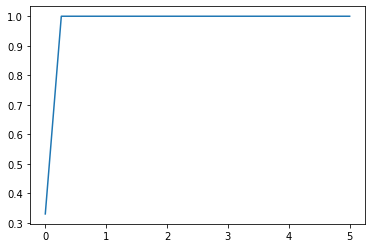

In [30]:
epsilons = np.linspace(0.001, 5, num=20)

print(list(epsilons))

accuracies = []

for i in range(len(epsilons)):
    accuracies.append((laplacian_mean("total_amount", epsilons[i], 1000))[1])


print(list(accuracies))

plt.plot(epsilons, accuracies)
# plt.xscale('log')
plt.show()



# Make new dataset


In [31]:
# Epsilon 5
laplace = pd.DataFrame(columns = data.columns)
# laplace.columns = data.columns

    
for col_name in data.columns:

    print(col_name)
    priv_means = laplacian_mean(col_name, 1, 150000)

    laplace[col_name] = priv_means[0]


# for i in range(len(minmax_vals)):


VendorID
passenger_count
trip_distance
RatecodeID
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee
tpep_pickup_float
tpep_dropoff_float
store_and_fwd_flag_bin


In [32]:
laplace



,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.707989,1.388142,6.394145,1.415107,166.130081,163.661326,1.194080,12.784069,1.007325,0.491206,2.386245,0.373152,0.296545,19.011152,2.280799,0.081771,1.642382e+09,1.642383e+09,0.023818
1,1.707926,1.388115,6.453878,1.415177,166.130461,163.664362,1.194050,12.790949,1.007167,0.491200,2.385830,0.373719,0.296551,19.010114,2.280836,0.081780,1.642382e+09,1.642382e+09,0.023826
2,1.707971,1.388178,6.838413,1.415339,166.131685,163.662598,1.194033,12.786695,1.007441,0.491218,2.385816,0.373244,0.296540,19.007153,2.280840,0.081783,1.642379e+09,1.642384e+09,0.023820
3,1.707982,1.388114,6.280527,1.414933,166.130649,163.662943,1.194059,12.788815,1.007350,0.491202,2.387432,0.373481,0.296538,19.005286,2.280827,0.081775,1.642379e+09,1.642386e+09,0.023820
4,1.707919,1.388058,5.702822,1.415788,166.132634,163.663942,1.194065,12.789647,1.007206,0.491200,2.386361,0.373350,0.296545,19.010549,2.280815,0.081771,1.642383e+09,1.642383e+09,0.023819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.707963,1.388122,5.599317,1.414213,166.130641,163.661654,1.194056,12.789828,1.007402,0.491200,2.386371,0.373030,0.296545,19.006407,2.280829,0.081775,1.642383e+09,1.642384e+09,0.023816
149996,1.707973,1.388133,6.231592,1.415588,166.130968,163.661571,1.194059,12.790251,1.007334,0.491199,2.385278,0.373744,0.296544,18.996005,2.280834,0.081787,1.642380e+09,1.642382e+09,0.023820
149997,1.707971,1.388130,6.460126,1.415281,166.131404,163.662311,1.194087,12.795049,1.007429,0.491194,2.385913,0.373609,0.296542,19.006325,2.280818,0.081782,1.642381e+09,1.642382e+09,0.023821
149998,1.707996,1.388139,6.070730,1.415237,166.130349,163.662822,1.194073,12.791185,1.007367,0.491206,2.386401,0.373355,0.296546,19.007220,2.280839,0.081780,1.642383e+09,1.642383e+09,0.023821


In [33]:
from google.colab import files
df.to_csv('laplacian_output.csv', encoding = 'utf-8-sig') 
files.download('laplacian_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Accuracy functions

In [ ]:
def test_accuracy(data, epsilon=1, column_name='total_amount', num_iterations=500):

    # actual mean and std.
    mean = np.nanmean(data[column_name])
    std = np.nanstd(data[column_name])
    mean_range = np.array([mean - 0.075 * std, mean + 0.075 * std])

    # create variables for determining empirical accuracy.
    total, correct = 0, 0

    for i in range(num_iterations):
        total += 1
        A = laplacian_mean(data, epsilon, num_iterations)
        if (A < mean_range[-1] and A > mean_range[0]):
            correct += 1

    return correct / total

def test_accuracy_dataset(data, new_data, column_name='total_amount'):

    # actual mean and std.
    mean = np.nanmean(data[column_name])
    std = np.nanstd(data[column_name])

    mean_range = np.array([mean - 0.075 * std, mean + 0.075 * std])

    # create variables for determining empirical accuracy.
    total, correct = 0, 0

    for i in range(len(new_data)):
        total += 1
        # A = sample_aggregate(data, epsilon, block_size)
        if (new_data[column_name][i] < mean_range[-1] and new_data[column_name][i] > mean_range[0]):
            correct += 1

    return correct / total

In [ ]:
for col_name in data.columns:
    acc = test_accuracy(data=data, epsilon=1, column_name=col_name)
    print(col_name, ": ", acc)

In [ ]:
for col_name in data.columns:
    acc = test_accuracy_dataset(data= data, new_data=laplace, column_name=col_name)
    print(col_name, ": ", acc)

# Laplacian Variance

In [ ]:

# calculates mean without applying differential privacy
def true_var(col: str) -> float:
    return statistics.variance(list(data[col]))

# calculates variance applying differential privacy
def private_var(col: str, privacy_budget: float) -> float:
    range = max(list(data[col])) - min(list(data[col]))
    x = BoundedVariance(
            epsilon=privacy_budget,
            delta=0,
            lower_bound= 0,
            upper_bound= true_var(col) + range,
            dtype= "float",
        )
    return x.quick_result(list(data[col]))

In [ ]:
print("Variance: ", true_var("trip_distance"))
print("Priv Var: ", private_var("trip_distance", 10))